In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive (2).zip to archive (2).zip


In [ ]:
import zipfile

with zipfile.ZipFile("archive (2).zip", 'r') as zip_ref:  # change to match the uploaded file name
    zip_ref.extractall("/content/gesture_data")


In [ ]:
import os
os.listdir("/content/gesture_data")


['train', 'test']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    '/content/gesture_data/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    '/content/gesture_data/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 14400 images belonging to 1 classes.
Found 3600 images belonging to 1 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    '/content/gesture_data/train/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    '/content/gesture_data/train/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 14400 images belonging to 20 classes.
Found 3600 images belonging to 20 classes.


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(20, activation='softmax')  # 20 output classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history2 = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator,
    verbose=1
)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


450/450 ━━━━━━━━━━━━━━━━━━━━ 111s 241ms/step - accuracy: 0.9003 - loss: 0.3445 - val_accuracy: 0.9994 - val_loss: 0.0045
Epoch 2/5
450/450 ━━━━━━━━━━━━━━━━━━━━ 143s 245ms/step - accuracy: 0.9998 - loss: 6.4393e-04 - val_accuracy: 0.9997 - val_loss: 0.0048
Epoch 3/5
450/450 ━━━━━━━━━━━━━━━━━━━━ 139s 237ms/step - accuracy: 0.9996 - loss: 0.0018 - val_accuracy: 0.9972 - val_loss: 0.0096
Epoch 4/5
450/450 ━━━━━━━━━━━━━━━━━━━━ 106s 236ms/step - accuracy: 0.9993 - loss: 0.0035 - val_accuracy: 0.9994 - val_loss: 0.0027
Epoch 5/5
450/450 ━━━━━━━━━━━━━━━━━━━━ 107s 237ms/step - accuracy: 0.9999 - loss: 3.6422e-04 - val_accuracy: 0.9975 - val_loss: 0.0142


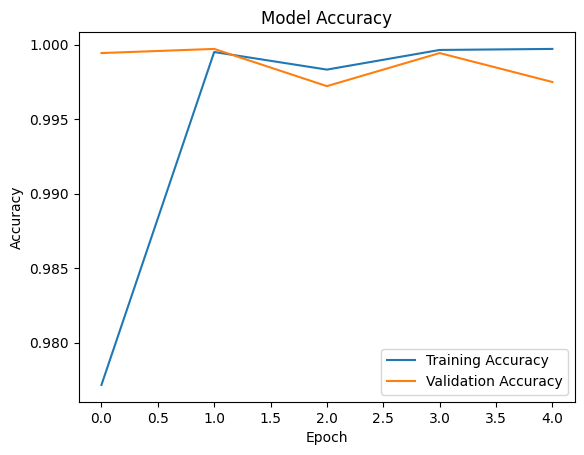

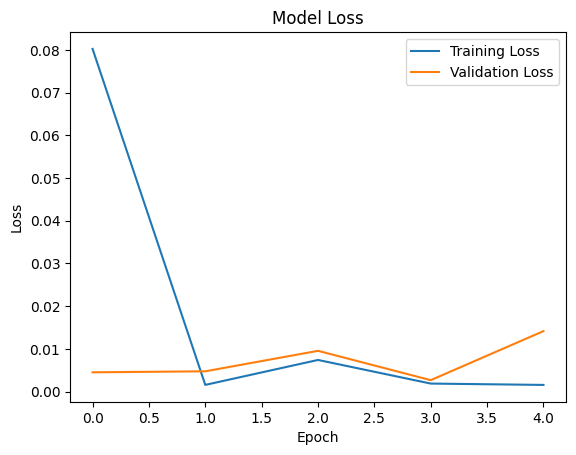

In [ ]:
import matplotlib.pyplot as plt

# Combine history from both training rounds (if needed)
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

# Accuracy Plot
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss Plot
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving WhatsApp Image 2025-06-19 at 4.25.28 PM.jpeg to WhatsApp Image 2025-06-19 at 4.25.28 PM.jpeg


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img('/content/WhatsApp Image 2025-06-19 at 4.25.28 PM.jpeg', target_size=(64, 64))  # Update filename
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)
class_labels = list(train_generator.class_indices.keys())

print("Predicted Gesture:", class_labels[predicted_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Predicted Gesture: 14


In [ ]:
print(train_generator.class_indices)


{'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '3': 13, '4': 14, '5': 15, '6': 16, '7': 17, '8': 18, '9': 19}


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get true labels and predicted labels
val_generator.reset()
Y_pred = model.predict(val_generator, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())


113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step


In [ ]:
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))


Classification Report:

              precision    recall  f1-score   support

           0       0.09      0.09      0.09       180
           1       0.03      0.03      0.03       180
          10       0.05      0.05      0.05       180
          11       0.07      0.07      0.07       180
          12       0.07      0.07      0.07       180
          13       0.04      0.04      0.04       180
          14       0.04      0.04      0.04       180
          15       0.06      0.06      0.06       180
          16       0.06      0.06      0.06       180
          17       0.07      0.07      0.07       180
          18       0.03      0.03      0.03       180
          19       0.05      0.04      0.04       180
           2       0.04      0.04      0.04       180
           3       0.03      0.03      0.03       180
           4       0.05      0.05      0.05       180
           5       0.04      0.04      0.04       180
           6       0.04      0.04      0.04       180
   

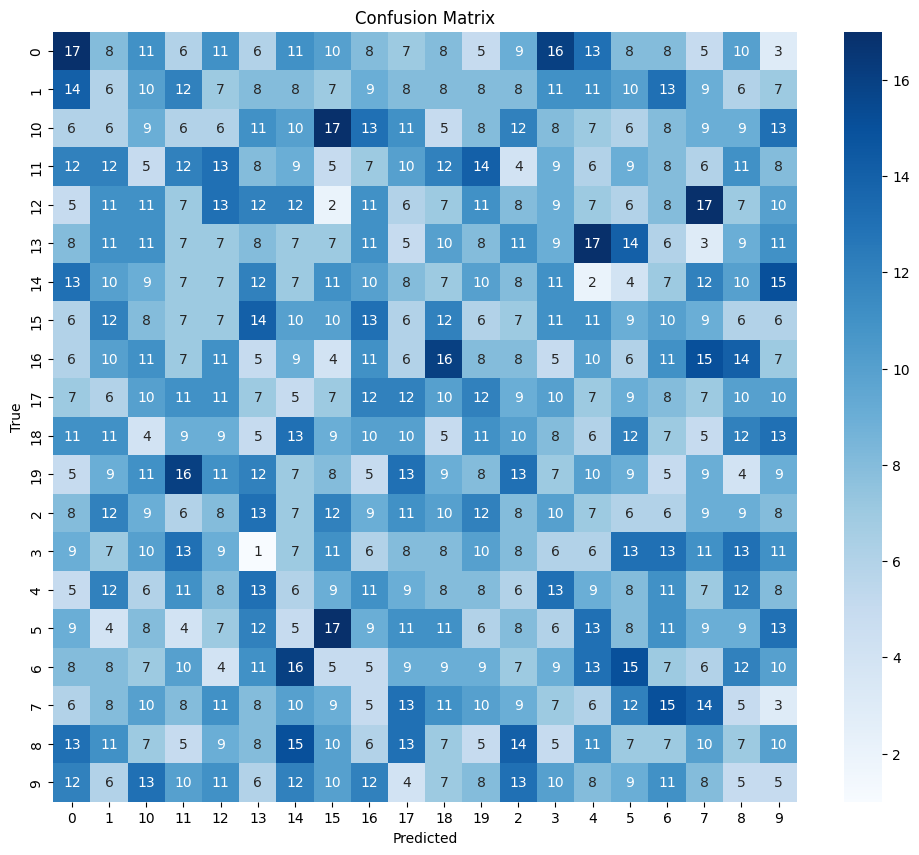

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


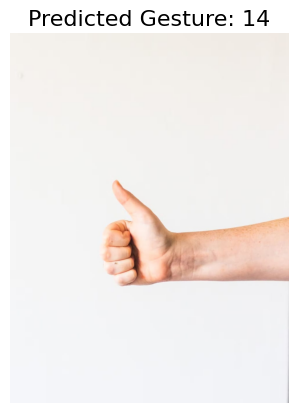

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = 'WhatsApp Image 2025-06-19 at 4.25.28 PM.jpeg'  # ✅ fixed filename
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class]

plt.imshow(image.load_img(img_path))
plt.title(f'Predicted Gesture: {predicted_label}', fontsize=16)
plt.axis('off')
plt.show()
